In [43]:
import numpy as np
import pandas as pd
import csv
from fxpmath import Fxp
import matplotlib.pyplot as plt


In [2]:
x = Fxp(-3.25, True, 32, 16)
x.bin()

'11111111111111001100000000000000'

In [9]:
def multisimToMemory(input_filename, 
                     output_filename="out.txt", 
                     nsamples=10000,
                     channel='Y--Trace 1::[Channel A]'):
    df = pd.read_csv(input_filename)
    df=df.iloc[:nsamples]
    result=[]
    for n in df[channel]:
        result.append(Fxp(n, True, 32, 16).bin())
        
    file = open(output_filename,"w") 
    file.write("\n".join(result)) 
    file.close()

In [10]:
multisimToMemory(
                input_filename="datos_multisim/Sallen-Key 10kHz.csv",
                output_filename="in_ram.txt",
                nsamples=1000)

In [11]:
x = Fxp(1.5, True, 32, 16)
x.bin()

'00000000000000011000000000000000'

In [249]:
x = Fxp(-1.25, True, 32, 16)
x.bin()

'11111111111111101100000000000000'

In [13]:
len('11111111111111001100000000000000')

32

In [14]:
len("11111111111111001100000000000000")

32

In [23]:
11111111111111100100000000000000

11111111111111100100000000000000

In [106]:
x = Fxp('0b11111111111111001100000000000000', True, 32, 16)


In [107]:
x.real

-3.25

In [15]:
x = Fxp(1, True, 32, 16)
x.bin()

'00000000000000010000000000000000'

In [34]:
def arrayToMemory(array_in, 
                     output_filename="out.txt"):
    result=[]
    for n in array_in:
        result.append(Fxp(n, True, 32, 16).bin())
    file = open(output_filename,"w") 
    file.write("\n".join(result)) 
    file.close()

In [35]:
arrayToMemory(signal,"generado_20k.txt")

array([ 0.00000000e+00, -3.21624530e-16,  6.43249060e-16, ...,
        1.11457973e-12, -6.24126804e-12,  1.13679563e-11])

0.0

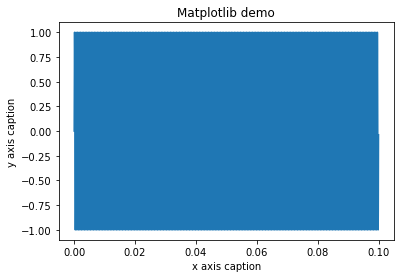

In [133]:
t=100e-3
sf=40e3*2*np.pi
freq=2e3


x = np.arange(0,t*sf)*(1/sf)
y = np.sin(x*freq*2*np.pi)


plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()


In [91]:
arrayToMemory(y,"generado_2k.txt")

In [215]:
def readMem(filename, sample_freq=2e3):
    with open(filename) as f:
        content = f.readlines()
    content = [Fxp(x.strip(), True, 32, 16).real  for x in content[2:]] 
    x = np.arange(0,len(content))*(1/sample_freq)
    return (x,np.array(content))
              

In [265]:
print(Fxp(0.2, True, 32, 16).bin())
print(Fxp(-0.2, True, 32, 16).bin())

00000000000000000011001100110011
11111111111111111100110011001101


In [250]:
Fxp('32b11111111111111011000000000000000', True, 32, 16)

-2.5

In [274]:
x,y=readMem("respuesta 2K.txt",2e3)
y[:25]

array([0.        , 0.02497864, 0.0499115 , 0.07470703, 0.09931946,
       0.12368774, 0.14775085, 0.17144775, 0.19470215, 0.21746826,
       0.23970032, 0.26133728, 0.28231812, 0.30258179, 0.32209778,
       0.34080505, 0.3586731 , 0.37562561, 0.3916626 , 0.4066925 ,
       0.42073059, 0.43370056, 0.44560242, 0.45637512, 0.46601868])

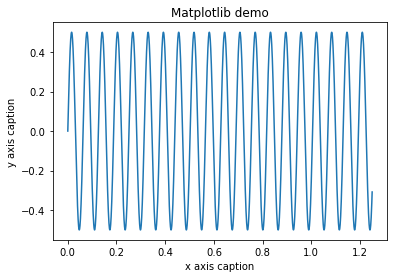

In [275]:
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()



In [228]:
Fxp("32b11111111111111111100110011001101", True, 32, 16).real

-0.1999969482421875

In [139]:
len("00000000000000000000011001100101")

32

In [272]:
r1= Fxp('32b11111111111111111111110101110001', True, 32, 16)
r2= Fxp('32b11111111111111111111010111000011', True, 32, 16)
r3= Fxp('32b11111111111111011000000000000000', True, 32, 16)
r4= Fxp('32b00000000000000101000000000000000', True, 32, 16)
r5= Fxp('32b00000000000000010100100000101111', True, 32, 16)

In [273]:
print(0.05*-0.2,r1)
print(0.2*-0.2,r2)
print(5*-0.5,r3)
print(5*0.5,r4)
print(-5*-0.2564,r5)

-0.010000000000000002 -0.0099945068359375
-0.04000000000000001 -0.0399932861328125
-2.5 -2.5
2.5 2.5
1.282 1.2819671630859375


In [271]:
0.2*-0.2

-0.04000000000000001